# Вариант 11(1)

## Часть 1

### Коэффициенты и формулы

In [ ]:
import numpy as np
import pandas as pd
import random
import math

In [ ]:
def cpk(data, std):
    """Функция для расчета Cpk.
    
    Аргументы:
    data -- массив данных
    std -- стандартное отклонение
    
    Возвращает значение Cpk.
    """
    x_bar = np.mean(data)
    spec_upper = x_bar + 3 * std
    spec_lower = x_bar - 3 * std
    cpk_upper = (spec_upper - x_bar) / (3 * std)
    cpk_lower = (x_bar - spec_lower) / (3 * std)
    return min(cpk_upper, cpk_lower)


def cp(data, std):
    upper_tol = np.mean(data) + (std * 3)
    lower_tol = np.mean(data) - (std * 3)
    spec_width = np.max(data) - np.min(data)
    return spec_width / (6 * std)

In [ ]:
import plotly.graph_objects as go
import numpy as np

def plotly_control_chart(values, std):
    # Calculate the mean of the data
    mean = np.mean(values)
    
    # Calculate the control limits
    UCL = mean + 3*std
    LCL = mean - 3*std
    
    # Divide the area between control limits into six zones
    zone_width = std
    zone_A_upper = UCL - zone_width
    zone_A_lower = LCL + zone_width

    
    
    # Create the chart trace
    trace = go.Scatter(
        x=list(range(len(values))),
        y=values,
        mode='lines+markers',
        marker=dict(color='blue', size=5),
        name='Data Points'
    )
    
    # Create the A line trace
    A_line_upper = go.Scatter(
        x=[0, len(values)-1],
        y=[zone_A_upper, zone_A_upper],
        mode='lines',
        line=dict(color='red', width=2, dash='dash'),
        name='B Line (Upper)'
    )
    A_line_lower = go.Scatter(
        x=[0, len(values)-1],
        y=[zone_A_lower, zone_A_lower],
        mode='lines',
        line=dict(color='red', width=2, dash='dash'),
        name='B Line (Lower)'
    )
    
    # Create the B lines trace
    B_line_upper = go.Scatter(
        x=[0, len(values)-1],
        y=[UCL, UCL],
        mode='lines',
        line=dict(color='green', width=2, dash='dash'),
        name='A Line (Upper)'
    )
    B_line_lower = go.Scatter(
        x=[0, len(values)-1],
        y=[LCL, LCL],
        mode='lines',
        line=dict(color='green', width=2, dash='dash'),
        name='A Line (Lower)'
    )
    
    # Create the C lines trace
    C_line_upper = go.Scatter(
        x=[0, len(values)-1],
        y=[mean + std, mean + std],
        mode='lines',
        line=dict(color='black', width=2, dash='dash'),
        name='C Line (Upper)'
    )
    C_line_lower = go.Scatter(
        x=[0, len(values)-1],
        y=[mean - std, mean - std],
        mode='lines',
        line=dict(color='black', width=2, dash='dash'),
        name='C Line (Lower)'
    )
    
    # Add all the traces to the figure
    fig = go.Figure()
    fig.add_trace(trace)
    fig.add_trace(A_line_upper)
    fig.add_trace(A_line_lower)
    fig.add_trace(B_line_upper)
    fig.add_trace(B_line_lower)
    fig.add_trace(C_line_upper)
    fig.add_trace(C_line_lower)
    # Add the mean line
    fig.add_shape(type="line", x0=0, x1=len(values)-1, y0=mean, y1=mean, line=dict(color='gray', width=2), name='Mean')
    
    # Set the figure layout
    fig.update_layout(
        title='Control Chart',
        xaxis_title='Sample Number',
        yaxis_title='Value'
    )
    
    return fig

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def matplotlib_control_chart(values, std):
    # Calculate the mean of the data
    mean = np.mean(values)

    # Calculate the control limits
    UCL = mean + 3*std
    LCL = mean - 3*std

    # Divide the area between control limits into six zones
    zone_width = std
    zone_A_upper = UCL - zone_width
    zone_A_lower = LCL + zone_width

    # Initialize lists to store the data points in each zone
    zone_A = []
    zone_B = []
    zone_C = []

    # Loop through the data and categorize each point into its respective zone
    for i in range(len(values)):
        if values[i] > UCL or values[i] < LCL:
            zone_C.append(i)
        elif values[i] > zone_A_upper or values[i] < zone_A_lower:
            zone_A.append(i)
        else:
            zone_B.append(i)

    # Plot the data and control limits
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(values, label='Data')
    ax.axhline(UCL, color='r', linestyle='--', label='UCL')
    ax.axhline(LCL, color='r', linestyle='--', label='LCL')
    ax.axhline(mean, color='g', linestyle='-', label='Mean')
    ax.fill_between(np.arange(len(values)), UCL, LCL, facecolor='gray', alpha=0.2)

    # Plot the zone boundaries
    ax.axhline(zone_A_upper, color='purple', linestyle='-', label='A Zone')
    ax.axhline(zone_A_lower, color='purple', linestyle='-')
    ax.axhline(mean + std, color='b', linestyle='-', label='B Zone')
    ax.axhline(mean - std, color='b', linestyle='-')

    # Plot the points in each zone
    ax.scatter(zone_A, [values[i] for i in zone_A], color='purple', label='Zone A')
    ax.scatter(zone_B, [values[i] for i in zone_B], color='b', label='Zone B')
    ax.scatter(zone_C, [values[i] for i in zone_C], color='r', label='Zone C')

    

    ax.legend()
    plt.show()


In [ ]:
a2_constants = {
    2: 1.880,
    3: 1.023,
    4: 0.729,
    5: 0.577,
    6: 0.483,
    7: 0.419,
    8: 0.373,
    9: 0.337,
    10: 0.308,
    11: 0.285,
    12: 0.266,
    13: 0.249,
    14: 0.235,
    15: 0.223,
    16: 0.212,
    17: 0.203,
    18: 0.194,
    19: 0.187,
    20: 0.180,
    21: 0.173,
    22: 0.167,
    23: 0.162,
    24: 0.157,
    25: 0.153,
    26: 0.149,
    27: 0.145,
    28: 0.142,
    29: 0.139,
    30: 0.136,
    31: 0.133,
    32: 0.131,
    33: 0.129,
    34: 0.127,
    35: 0.125,
    36: 0.123,
    37: 0.121,
    38: 0.119,
    39: 0.118,
    40: 0.116,
    41: 0.114,
    42: 0.113,
    43: 0.112,
    44: 0.111,
    45: 0.110,
    46: 0.108,
    47: 0.107,
    48: 0.106,
    49: 0.105,
    50: 0.104
}


In [ ]:
b1_values = {
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0.085,
    7: 0.158,
    8: 0.215,
    9: 0.262,
    10: 0.302,
    11: 0.336,
    12: 0.365,
    13: 0.392,
    14: 0.414,
    15: 0.434,
    16: 0.454,
    17: 0.469,
    18: 0.486,
    19: 0.500,
    20: 0.513,
    21: 0.525,
    22: 0.536,
    23: 0.546,
    24: 0.556,
    25: 0.566
}

In [ ]:
c_values = {
    2: 0.798,
    3: 0.886,
    4: 0.921,
    5: 0.940,
    6: 0.951,
    7: 0.960,
    8: 0.965,
    9: 0.969,
    10: 0.973,
    11: 0.976,
    12: 0.977,
    13: 0.980,
    14: 0.980,
    15: 0.981,
    16: 0.984,
    17: 0.984,
    18: 0.986,
    19: 0.986,
    20: 0.987,
    21: 0.988,
    22: 0.988,
    23: 0.989,
    24: 0.989,
    25: 0.990
}

In [ ]:
b2_values = {
    2: 2.298,
    3: 2.111,
    4: 1.982,
    5: 1.889,
    6: 1.817,
    7: 1.762,
    8: 1.715,
    9: 1.676,
    10: 1.644,
    11: 1.616,
    12: 1.589,
    13: 1.568,
    14: 1.548,
    15: 1.530,
    16: 1.514,
    17: 1.499,
    18: 1.486,
    19: 1.472,
    20: 1.461,
    21: 1.451,
    22: 1.440,
    23: 1.432,
    24: 1.422,
    25: 1.414
}

In [ ]:
def process_control_analysis_1(data, real_std):
    """Performs process control analysis on input data.
    
    Args:
        data (numpy.ndarray): Input data to analyze.
        real_std (float): Real standard deviation of the input data.
        
    Returns:
        tuple: A tuple containing the following elements:
            - bool: Whether the data is within control limits (True) or not (False).
            - float: The upper control limit (UCL).
            - float: The lower control limit (LCL).
            - str: A string containing all values outside the control limits (empty if none).
    """
    
    # Define constants for control limits
    k = 3  # number of standard deviations
    
    # Calculate control limits
    n = len(data)
    x_bar = np.mean(data)
    UCL = x_bar + k * real_std
    LCL = x_bar - k * real_std
    
    # Check if any values lie outside control limits
    outside_limits = []
    for i,value in enumerate(data):
        if value > UCL or value < LCL:
            outside_limits.append(i)
    
    return (not(not outside_limits), UCL, LCL, str(outside_limits))

In [ ]:
def process_control_analysis_2(values, std):
    # Calculate the mean of the data
    mean = np.mean(values)
    
    # Calculate the control limits
    UCL = mean + 3*std
    LCL = mean - 3*std
    
    # Divide the area between control limits into six zones
    zone_width = std
    zone_A_upper = UCL - zone_width
    zone_A_lower = LCL + zone_width
    
    # Initialize a list to store the consecutive points in zone A
    consecutive_points_in_zone_A = []
    
    # Loop through the data and check if two of the three consecutive points lie in zone A
    for i in range(len(values) - 2):
      zone_A_count_up = 0
      zone_A_count_down = 0
      subset = values[i:i+3]
      zone_A_count_up = sum(subset < zone_A_lower)
      zone_A_count_down = sum(subset > zone_A_upper)
      if zone_A_count_up >= 2:
          consecutive_points_in_zone_A.append((i, i+1, i+2))
      if zone_A_count_down >= 2:
          consecutive_points_in_zone_A.append((i, i+1, i+2))
    
        # Check if there are consecutive points in zone A
    if len(consecutive_points_in_zone_A) == 0:
        return False, []
    else:
        return True, consecutive_points_in_zone_A

In [ ]:
def process_control_analysis_3(values, std):
    # Calculate the mean of the data
    mean = np.mean(values)
    
    # Calculate the control limits
    UCL = mean + 3*std
    LCL = mean - 3*std
    
    # Divide the area between control limits into six zones
    zone_width = std
    zone_A_upper = UCL - 2*zone_width
    zone_A_lower = LCL + 2*zone_width
    
    # Initialize a list to store the consecutive points in zone A
    consecutive_points_in_zone_A = []
    
    # Loop through the data and check if two of the three consecutive points lie in zone A
    for i in range(len(values) - 4):
      zone_A_count_up = 0
      zone_A_count_down = 0
      subset = values[i:i+5]
      zone_A_count_up = sum(subset < zone_A_lower)
      zone_A_count_down = sum(subset > zone_A_upper)
      if zone_A_count_up >= 4:
          consecutive_points_in_zone_A.append((i, i+1, i+2,i+3,i+4))
      if zone_A_count_down >= 4:
          consecutive_points_in_zone_A.append((i, i+1, i+2,i+3,i+4))
    
        # Check if there are consecutive points in zone A
    if len(consecutive_points_in_zone_A) == 0:
        return False, []
    else:
        return True, consecutive_points_in_zone_A


In [ ]:
def process_control_analysis_4(values, std):
    # Calculate the mean of the data
    mean = np.mean(values)
    
    # Calculate the control limits
    UCL = mean + 3*std
    LCL = mean - 3*std
    
    # Divide the area between control limits into six zones
    zone_width = std
    zone_A_upper = UCL - 2*zone_width
    zone_A_lower = LCL + 2*zone_width
    
    # Initialize a list to store the consecutive points in zone A
    consecutive_points_in_zone_A = []
    
    # Loop through the data and check if two of the three consecutive points lie in zone A
    for i in range(len(values) - 8):
      zone_A_count_up = 0
      zone_A_count_down = 0
      subset = values[i:i+9]
      zone_A_count_up = sum(subset < mean)
      zone_A_count_down = sum(subset > mean)
      if zone_A_count_up >= 9:
          consecutive_points_in_zone_A.append((i, i+8))
      if zone_A_count_down >= 9:
          consecutive_points_in_zone_A.append((i, i+8))
    
        # Check if there are consecutive points in zone A
    if len(consecutive_points_in_zone_A) == 0:
        return False, []
    else:
        return True, consecutive_points_in_zone_A

In [ ]:
def process_control_analysis_5(lst,std):
    """
    Checks if there are consecutive elements in the list `lst` that are either
    strictly increasing or strictly decreasing by at least 5. If such elements are found,
    returns True and a list of their indices; otherwise, returns False and an empty list.

    Args:
    lst: A list of numbers.
    std: An optional parameter specifying the maximum deviation from the mean that
         an oscillating sequence can have. Defaults to 1.

    Returns:
    A tuple containing a Boolean value indicating if consecutive elements were found
    and a list of their indices in `lst`.
    """
    ret = []
    count = 1
    for i in range(1, len(lst)):
        if lst[i] > lst[i-1]:
            count += 1
        else:
            if count >= 6:
                ret.append(i-count)
            count = 1

    if count >= 6:
        ret.append(len(lst)-count)

    count = 1
    for i in range(1, len(lst)):
        if lst[i] < lst[i-1]:
            count += 1
        else:
            if count >= 6:
                ret.append(i-count)
            count = 1

    if count >= 6:
        ret.append(len(lst)-count)

    if len(ret) > 0:
        return (True, ret)
    else:
        return (False, [])

In [ ]:
def process_control_analysis_6(lst, std):
    count = 1
    direction = None
    start_index = None
    for i in range(1, len(lst)):
        if lst[i] > lst[i-1]:
            if direction == 'down':
                count += 1
                direction = 'up'
            else:
              count = 1
              direction = 'up'

        elif lst[i] < lst[i-1]:
            if direction == 'up':
                count += 1
                direction = 'down'
            else:
              count = 1
              direction = 'down'
        else:
            count = 1
            direction = None
        if count >= 13:
          if start_index is None:
            start_index = i-count
    if start_index is not None:
        return True, [start_index]
    else:
        return False, []

In [ ]:
def process_control_analysis_7(data, std):

    mean = np.mean(data)
    UCL = mean + std
    LCL = mean - std
    count = 0
    start_indexes = []
    for i in range(len(data)):
        if data[i] >= UCL or data[i] <= LCL:
            count = 0
        else:
           count = count + 1

        if count >= 15:
            if (i - count + 1) not in start_indexes:
              start_indexes.append(i - count + 1)
    if start_indexes:
        return True, start_indexes
    else:
        return False, []

In [ ]:
def process_control_analysis_8(data, std):

    mean = np.mean(data)
    UCL = mean + std
    LCL = mean - std
    count = 0
    start_indexes = []
    for i in range(len(data)):
        if not (data[i] >= UCL or data[i] <= LCL):
            count = 0
        else:
           count = count + 1

        if count >= 8:
            if (i - count + 1) not in start_indexes:
              start_indexes.append(i - count + 1)
    if start_indexes:
        return True, start_indexes
    else:
        return False, []

In [ ]:
def check_all(data, std):
  first_feature = process_control_analysis_1(data, std)
  if first_feature[0] == False:
    print("1-OK")
  else: print( "Точки с индексами", first_feature[3])

  sec_feature = process_control_analysis_2(data, std)
  if sec_feature[0] == False:
    print("2-OK")
  else: print( "Точки с индексами", sec_feature[1])

  third_feature = process_control_analysis_3(data, std)
  if third_feature[0] == False:
    print("3-OK")
  else: print( "Точки с индексами", third_feature[1])

  fougth_feature = process_control_analysis_4(data, std)
  if fougth_feature[0] == False:
    print("4-OK")
  else: print( "Точки с индексами", fougth_feature[1])

  fif_feature = process_control_analysis_5(data, std)
  if fif_feature[0] == False:
    print("5-OK")
  else: print( "Точки с индексами", fif_feature[1])

  six_feature = process_control_analysis_6(data, std)
  if six_feature[0] == False:
    print("6-OK")
  else: print( "Точки с индексами", six_feature[1])

  seven_feature = process_control_analysis_7(data, std)
  if seven_feature[0] == False:
    print("7-OK")
  else: print( "Точки с индексами", seven_feature[1])

  eught_feature = process_control_analysis_8(data, std)
  if eught_feature[0] == False:
    print("8-OK")
  else: print( "Точки с индексами", eught_feature[1])

  
  


### Задание 1
 Сформировать выборку данных параметра х, полученных при выполнении процесса Y.Сформировать контрольную карту Шухарта (x-карта). Первые значение параметра х даны, дополнить выборку еще 30 элементами самостоятельно, использовать генератор нормально-распределенных выборок. Определить является ли процесс статистически управляемым. Влияют ли на систему особые причины, которые не позволяют добиться требуемого качества выполнения процесса. Если процесс является статистически управляемым, какие значения параметра х привели его в неуправляемое состояние. Промоделировать данную ситуацию. Указать значения. Графически представить данные.

Вариант 1. Значения параметра х (1, -2, 0, 1, 2, 2, -2, 1, 0,-1, 3)

Так как данные представляют собой индивидуальные занчения используется метод индивидуальных значений:
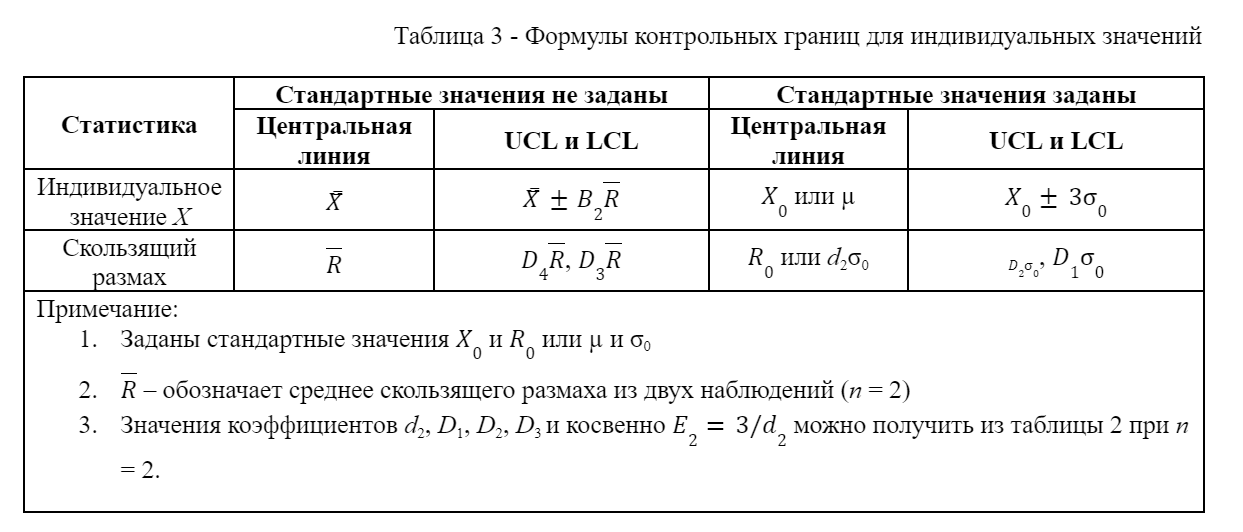

In [ ]:
import numpy as np

np.random.seed(42)  # фиксируем seed для воспроизводимости результатов

x_values = [1, -2, 0, 1, 2, 2, -2, 1, 0, -1, 3]  # заданные данные
x_values += list(np.random.normal(loc=0, scale=1, size=30))  # дополнительные данные нормальное распределение со средним значением 0 и стандартным отклонением 1
for x in x_values:
    print("{:.3f}".format(x))

1.000
-2.000
0.000
1.000
2.000
2.000
-2.000
1.000
0.000
-1.000
3.000
0.497
-0.138
0.648
1.523
-0.234
-0.234
1.579
0.767
-0.469
0.543
-0.463
-0.466
0.242
-1.913
-1.725
-0.562
-1.013
0.314
-0.908
-1.412
1.466
-0.226
0.068
-1.425
-0.544
0.111
-1.151
0.376
-0.601
-0.292


Далее нам нужно вычислить среднее значение и стандартное отклонение выборки:

In [ ]:
n = len(x_values)
mean = sum(x_values) / n
std_dev = (sum([(x - mean) ** 2 for x in x_values]) / (n - 1)) ** 0.5
print("mean: {:.3f}".format(mean))
print("std: {:.3f}".format(std_dev))


mean: -0.016
std: 1.157


In [ ]:
d2 = 1.128 # При n = 2
E2 = 3/d2

In [ ]:
# Calculate the sliding spans
spans = np.abs(np.diff(x_values))

# Calculate the average sliding span
avg_span = np.mean(spans)

ranges = E2 * avg_span
real_std = ranges/3
real_std

1.1551803693687253

Фукция принимает выборку и стондартное отклонение и проверяет на наличие признаков нестабильности процесса

In [ ]:
check_all(x_values, real_std)

1-OK
2-OK
3-OK
4-OK
5-OK
6-OK
7-OK
8-OK


Теперь мы можем сгенерировать контрольную диаграмму Шухарта, которая состоит из центральной линии, представляющей среднее значение, верхнего контрольного предела (UCL) и нижнего контрольного предела (LCL), которые рассчитываются на основе стандартного отклонения выборки:

In [ ]:
plotly_control_chart(x_values, real_std)

### Задание 2
Одним из параметров работы управления является время согласования конструкторской документации, которое обозначено за параметр х. Для того чтобы оценить является ли процесс статистически управляемым были выполнены замеры данного параметра в течение нескольких дней подряд.  Дано несколько выборок параметра х по дням. Дополнить самостоятельно параметры до 10 дней. Сформировать контрольную карту Шухарта (x-R)-карта для таких выборок. Определить какие значения параметра делают процесс статистически неуправляемым. Обосновать на основе полученных результатов требуется ли вмешательство в процесс. Графически представить данные. Использовать MathCad, MS Excel или др. В представленных вариантах значения параметра х закодированы.

Вариант 1. Значения параметра х

День 1(1, 2, 0, 1, 2, 2, 4, 1, 0,-1, 3)

День 2 ( -1, 1, 3, 0, 2, 0, 0 , -1, 3, 0, -3 )

День 3 (0, 0, 2, 1, 5, 0, 1, 2, 2, 2,3,1)

Карты для количественных данных отражают состояние процесса через разброс (изменчивость от единицы к единице) и через расположение центра (среднее процесса). Поэтому контрольные карты для количественных данных почти всегда применяют и анализируют парами – одна карта для расположения и одна – для разброса. Наиболее часто используют пару X- и R-карту. 
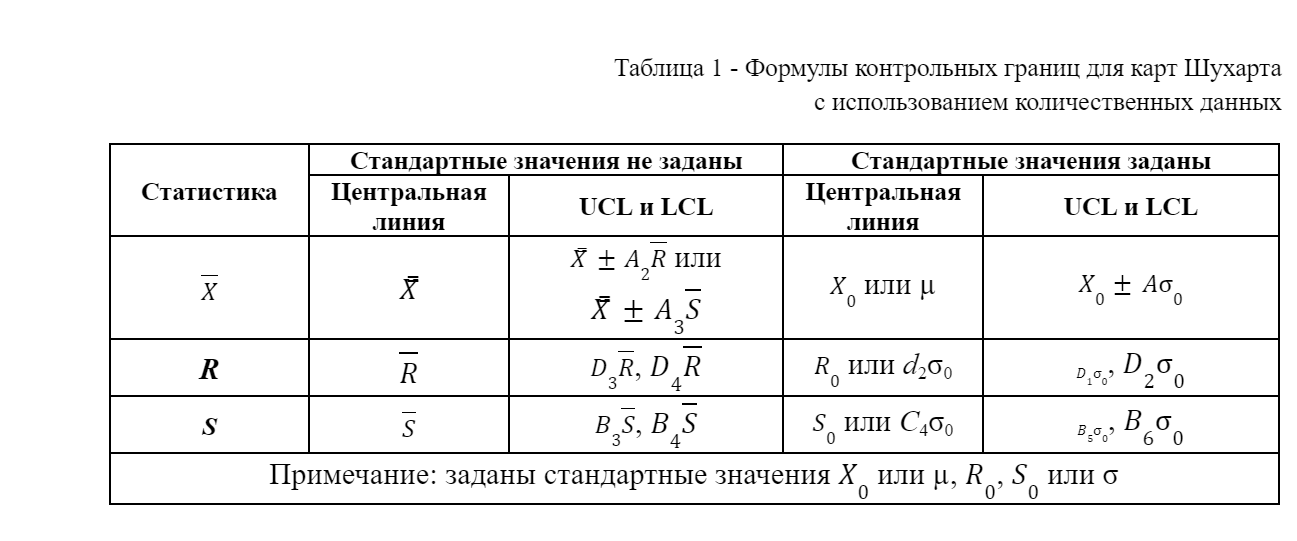

In [ ]:
# Define the data for 10 days
x = np.array([
    [1, 2, 0, 1, 2, 2, 4, 1, 0, -1, 3, np.nan],
    [-1, 1, 3, 0, 2, 0, 0, -1, 3, 0, -3, np.nan],
    [0, 0, 2, 1, 5, 0, 1, 2, 2, 2, 3, 1],
    [2, -1, 1, 1, 1, 0, 2, 2, 0, -2, 3, 1],
    [1, 0, 0, 1, -1, 3, 2, 0, -1, 1, -2, 2],
    [2, 3, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1],
    [0, 1, 1, 1, 1, 2, 2, 2, 2, -1, 0, 2],
    [0, 1, 1, 1, 1, -1, 0, 2, 2, 3, 1, 2],
    [2, 2, 3, 1, 0, 0, 0, 1, 1, -1, -1, 1],
    [1, 2, 2, 0, 2, 0, 0, 1, 2, 3, 1, 1]
])

x


array([[ 1.,  2.,  0.,  1.,  2.,  2.,  4.,  1.,  0., -1.,  3., nan],
       [-1.,  1.,  3.,  0.,  2.,  0.,  0., -1.,  3.,  0., -3., nan],
       [ 0.,  0.,  2.,  1.,  5.,  0.,  1.,  2.,  2.,  2.,  3.,  1.],
       [ 2., -1.,  1.,  1.,  1.,  0.,  2.,  2.,  0., -2.,  3.,  1.],
       [ 1.,  0.,  0.,  1., -1.,  3.,  2.,  0., -1.,  1., -2.,  2.],
       [ 2.,  3.,  2.,  1.,  0.,  1.,  1.,  0.,  2.,  2.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2., -1.,  0.,  2.],
       [ 0.,  1.,  1.,  1.,  1., -1.,  0.,  2.,  2.,  3.,  1.,  2.],
       [ 2.,  2.,  3.,  1.,  0.,  0.,  0.,  1.,  1., -1., -1.,  1.],
       [ 1.,  2.,  2.,  0.,  2.,  0.,  0.,  1.,  2.,  3.,  1.,  1.]])

In [ ]:
# Create a DataFrame with the mean and R of each day
df = pd.DataFrame(x)
df.columns = [f"x_{i}" for i in range(1, 13)]
df.index += 1  # Start the index at 1 instead of 0

df["mean"] = df.mean(axis=1)
df["R"] = df.max(axis=1) - df.min(axis=1)
df

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,mean,R
1,1.0,2.0,0.0,1.0,2.0,2.0,4.0,1.0,0.0,-1.0,3.0,NaN,1.363636,5.0
2,-1.0,1.0,3.0,0.0,2.0,0.0,0.0,-1.0,3.0,0.0,-3.0,NaN,0.363636,6.0
3,0.0,0.0,2.0,1.0,5.0,0.0,1.0,2.0,2.0,2.0,3.0,1.0,1.583333,5.0
4,2.0,-1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,-2.0,3.0,1.0,0.833333,5.0
5,1.0,0.0,0.0,1.0,-1.0,3.0,2.0,0.0,-1.0,1.0,-2.0,2.0,0.500000,5.0
6,2.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,1.333333,3.0
7,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,-1.0,0.0,2.0,1.083333,3.0
8,0.0,1.0,1.0,1.0,1.0,-1.0,0.0,2.0,2.0,3.0,1.0,2.0,1.083333,4.0
9,2.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.0,-1.0,1.0,0.750000,4.0
10,1.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,3.0,1.0,1.0,1.250000,3.0


Расчеты

In [ ]:
X_mean = df['mean'].mean()
R_mean = df['R'].mean()

A2 = a2_constants[12]
R_range = A2 * R_mean
X_real_std = R_range/3

D3 = 0.283 # для 12
D4 = 1.717 # для 12

R_UCL = D3 * R_mean
R_LCL = D4 * R_mean
R_real_std = (R_LCL - R_mean)/3

x_values_2 = df['mean'].values.tolist()
r_values = df['R'].values.tolist()



Создание графиков

Х

In [ ]:
check_all(x_values_2, X_real_std)

1-OK
2-OK
3-OK
4-OK
5-OK
6-OK
7-OK
8-OK


In [ ]:
plotly_control_chart(x_values_2, X_real_std)

R

In [ ]:
check_all(r_values, R_real_std)

1-OK
2-OK
3-OK
4-OK
5-OK
6-OK
7-OK
8-OK


In [ ]:
plotly_control_chart(r_values, R_real_std)

### Задание 3
По вариантам из задания 2 построить s-карту Шухарта.  Определить какие значения параметра делают процесс статистически неуправляемым. Обосновать на основе полученных результатов требуется ли вмешательство в процесс. Указать те значения параметра х, которые выходят за границы карты. Графически представить данные. Использовать MathCad, Excel или др. Оценить по R и S картам возможно процесса - PCI. 

In [ ]:
df['S'] = df.iloc[:, :-2].std(axis=1)
df

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,mean,R,S
1,1.0,2.0,0.0,1.0,2.0,2.0,4.0,1.0,0.0,-1.0,3.0,NaN,1.363636,5.0,1.433369
2,-1.0,1.0,3.0,0.0,2.0,0.0,0.0,-1.0,3.0,0.0,-3.0,NaN,0.363636,6.0,1.804036
3,0.0,0.0,2.0,1.0,5.0,0.0,1.0,2.0,2.0,2.0,3.0,1.0,1.583333,5.0,1.443376
4,2.0,-1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,-2.0,3.0,1.0,0.833333,5.0,1.403459
5,1.0,0.0,0.0,1.0,-1.0,3.0,2.0,0.0,-1.0,1.0,-2.0,2.0,0.500000,5.0,1.445998
6,2.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,1.333333,3.0,0.887625
7,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,-1.0,0.0,2.0,1.083333,3.0,0.996205
8,0.0,1.0,1.0,1.0,1.0,-1.0,0.0,2.0,2.0,3.0,1.0,2.0,1.083333,4.0,1.083625
9,2.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.0,-1.0,1.0,0.750000,4.0,1.215431
10,1.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,3.0,1.0,1.0,1.250000,3.0,0.965307


In [ ]:
S_mean = df['S'].mean()

B3 = 0.354 # для 12
B4 = 1.646 # для 12

UCL = B3*S_mean
LCL = B4*S_mean

S_range = S_mean - UCL
S_std = S_range/3

S_values = df['S'].values.tolist()

In [ ]:
check_all(S_values, S_std)

1-OK
2-OK
3-OK
4-OK
5-OK
6-OK
7-OK
8-OK


In [ ]:
plotly_control_chart(S_values, S_std)

###  Задание 4
Использовать варианты из задания 2. Сократить первую выборку до 15 элементов, Вторую выборку до 9 элементов. Третью выборку до 12 элементов.  И последнюю 4 до произвольного количества элементов. Построить s-карту Шухарта. Определить какие значения параметра делают процесс статистически неуправляемым. Обосновать на основе полученных результатов требуется ли вмешательство в процесс. Указать те значения параметра х, которые выходят за границы карты. Графически представить данные. Оценить по  S карте возможно процесса - PCI.Использовать MathCad, Excel или др.

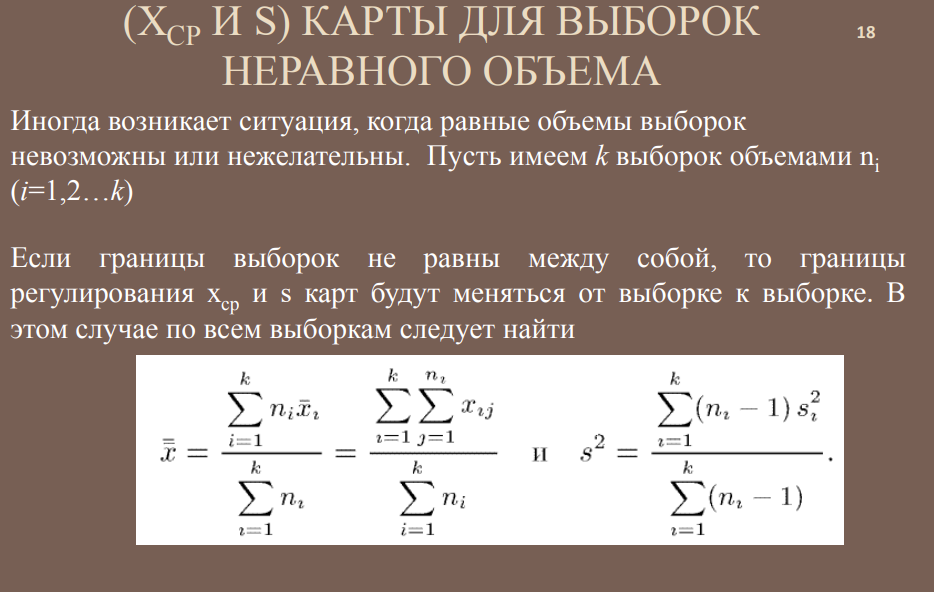

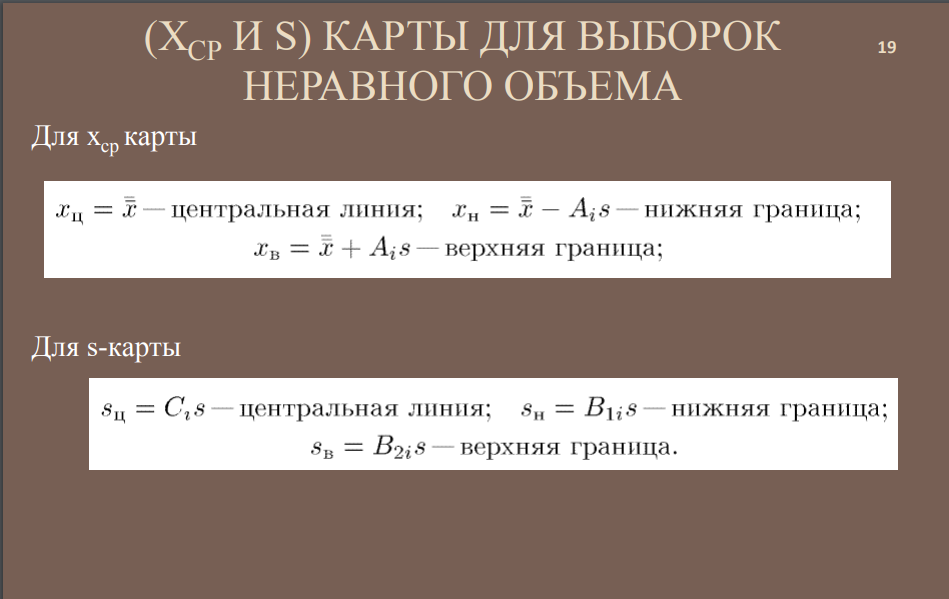

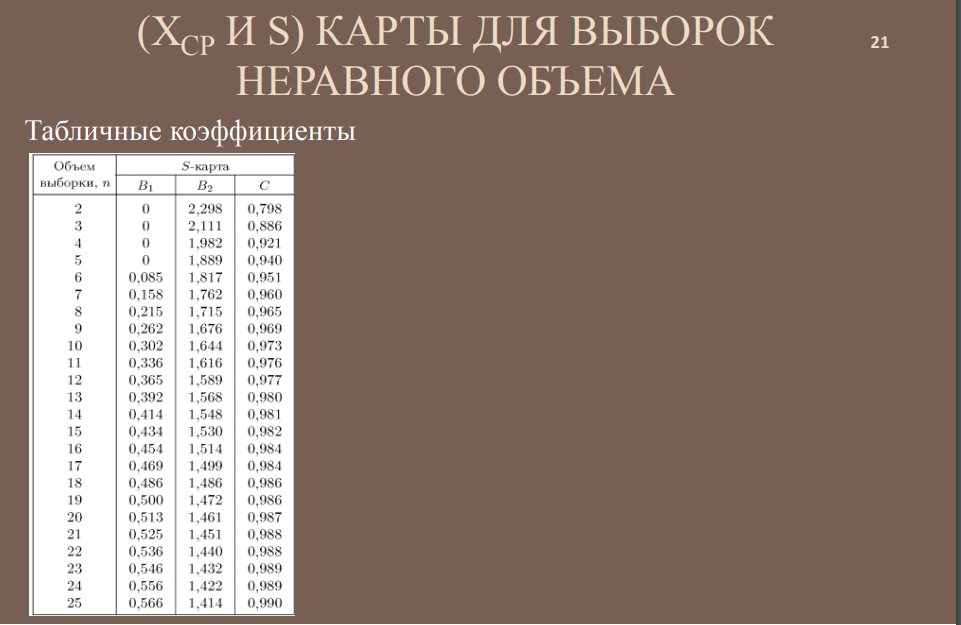

In [ ]:
new_x = []

for line in x:
  line = np.concatenate((line, np.random.normal(loc=0, scale=2, size=13).astype(int)))
  new_x.append(line)

In [ ]:
new_x = [line[~np.isnan(line)] for line in new_x]
new_x

[array([ 1.,  2.,  0.,  1.,  2.,  2.,  4.,  1.,  0., -1.,  3., -1.,  3.,
         0., -2.,  1., -2.,  0., -3., -2.,  0.,  1.,  0.,  0.]),
 array([-1.,  1.,  3.,  0.,  2.,  0.,  0., -1.,  3.,  0., -3.,  0., -2.,
        -1.,  0.,  2.,  0., -3.,  0.,  0., -1.,  1.,  2.,  1.]),
 array([ 0.,  0.,  2.,  1.,  5.,  0.,  1.,  2.,  2.,  2.,  3.,  1., -1.,
         0.,  0.,  1.,  0.,  0., -2., -2.,  1.,  2.,  0.,  2.,  0.]),
 array([ 2., -1.,  1.,  1.,  1.,  0.,  2.,  2.,  0., -2.,  3.,  1., -1.,
         0.,  3.,  0.,  3., -5.,  1.,  0.,  0.,  0., -3.,  0.,  0.]),
 array([ 1.,  0.,  0.,  1., -1.,  3.,  2.,  0., -1.,  1., -2.,  2.,  2.,
        -1., -1., -1.,  1.,  0., -1.,  1.,  0.,  1., -1.,  0.,  0.]),
 array([ 2.,  3.,  2.,  1.,  0.,  1.,  1.,  0.,  2.,  2.,  1.,  1., -2.,
         0.,  0.,  0.,  0., -2.,  0.,  0., -1.,  0.,  0.,  3.,  0.]),
 array([ 0.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2., -1.,  0.,  2.,  0.,
         0., -3.,  0.,  0.,  4.,  0.,  0.,  0., -2.,  2.,  1.,  1.]),
 array([ 

In [ ]:
# Reduce the first selection to 15 elements
new_x[0] = new_x[0][:15]

# Reduce the second selection to 9 elements
new_x[1] = new_x[1][:9]

# Reduce the third selection of up to 12 elements
new_x[2] = new_x[2][:12]


# Reduce the last 4 selections to an arbitrary number of elements
new_x[6] = new_x[3][:random.randint(2, 25)]
new_x[7] = new_x[4][:random.randint(2, 25)]
new_x[8] = new_x[5][:random.randint(2, 25)]
new_x[9] = new_x[6][:random.randint(2, 25)]
new_x

[array([ 1.,  2.,  0.,  1.,  2.,  2.,  4.,  1.,  0., -1.,  3., -1.,  3.,
         0., -2.]),
 array([-1.,  1.,  3.,  0.,  2.,  0.,  0., -1.,  3.]),
 array([0., 0., 2., 1., 5., 0., 1., 2., 2., 2., 3., 1.]),
 array([ 2., -1.,  1.,  1.,  1.,  0.,  2.,  2.,  0., -2.,  3.,  1., -1.,
         0.,  3.,  0.,  3., -5.,  1.,  0.,  0.,  0., -3.,  0.,  0.]),
 array([ 1.,  0.,  0.,  1., -1.,  3.,  2.,  0., -1.,  1., -2.,  2.,  2.,
        -1., -1., -1.,  1.,  0., -1.,  1.,  0.,  1., -1.,  0.,  0.]),
 array([ 2.,  3.,  2.,  1.,  0.,  1.,  1.,  0.,  2.,  2.,  1.,  1., -2.,
         0.,  0.,  0.,  0., -2.,  0.,  0., -1.,  0.,  0.,  3.,  0.]),
 array([ 2., -1.,  1.,  1.,  1.,  0.,  2.,  2.,  0., -2.,  3.,  1., -1.,
         0.,  3.,  0.]),
 array([ 1.,  0.,  0.,  1., -1.,  3.,  2.,  0., -1.,  1., -2.,  2.,  2.,
        -1., -1., -1.,  1.,  0., -1.]),
 array([ 2.,  3.,  2.,  1.,  0.,  1.,  1.,  0.,  2.,  2.,  1.,  1., -2.,
         0.,  0.,  0.,  0., -2.,  0.,  0., -1.,  0.]),
 array([ 2., -1.,  1.,  1.

In [ ]:

# Nested list with ambiguous length
nested_list = new_x

# Find the maximum length of sublists
max_length = max([len(sublist) for sublist in nested_list])

# Convert to nested list of lists
nested_list = [[x for x in arr] for arr in nested_list]

# Add padding to sublists that are shorter than the maximum length
padded_list = [sublist + [np.NaN]*(max_length - len(sublist)) for sublist in nested_list]

# Create dataframe from padded list
df = pd.DataFrame(padded_list)

# Rename columns to start from 1
df.columns = df.columns + 1



# Add additional columns for mean and range
df["mean"] = df.mean(axis=1)
df["R"] = df.max(axis=1) - df.min(axis=1)

# Start the index at 1 instead of 0
df.index += 1

df['S'] = df.iloc[:, :-2].std(axis=1)


df['S2'] = df.iloc[:, :-3].var(axis=1)

df['n'] = max_length - df.isna().sum(axis=1)

# Display the resulting dataframe
df

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,mean,R,S,S2,n
1,1.0,2.0,0.0,1.0,2.0,2.0,4.0,1.0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,1.000000,6.0,1.690309,2.857143,15
2,-1.0,1.0,3.0,0.0,2.0,0.0,0.0,-1.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.777778,4.0,1.563472,2.444444,9
3,0.0,0.0,2.0,1.0,5.0,0.0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,1.583333,5.0,1.443376,2.083333,12
4,2.0,-1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,-2.0,...,0.0,0.0,-3.0,0.0,0.0,0.320000,8.0,1.842100,3.393333,25
5,1.0,0.0,0.0,1.0,-1.0,3.0,2.0,0.0,-1.0,1.0,...,0.0,1.0,-1.0,0.0,0.0,0.240000,5.0,1.234234,1.523333,25
6,2.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,...,-1.0,0.0,0.0,3.0,0.0,0.560000,5.0,1.293574,1.673333,25
7,2.0,-1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,0.750000,5.0,1.437591,2.066667,16
8,1.0,0.0,0.0,1.0,-1.0,3.0,2.0,0.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.263158,5.0,1.367971,1.871345,19
9,2.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,...,-1.0,0.0,NaN,NaN,NaN,0.500000,5.0,1.263027,1.595238,22
10,2.0,-1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,0.818182,5.0,1.470930,2.163636,11


In [ ]:
# iterate over each row of the table
for index, row in df.iterrows():
    # extract the value of n and S for the current row
    n = row['n']
    S = row['S']
    
    # compute the values of C, B1, and B2 based on n and S
    C_value = c_values[n] * S
    B1_value = b1_values[n] * S
    B2_value = b2_values[n] * S

    sigma_value = (B2_value - C_value)/3
    
    # add the computed values of C, B1, and B2 as new columns to the current row
    df.loc[index, 'C'] = C_value
    df.loc[index, 'B1'] = B1_value
    df.loc[index, 'B2'] = B2_value
    df.loc[index, 'std_real'] = sigma_value
df


,1,2,3,4,5,6,7,8,9,10,...,25,mean,R,S,S2,n,C,B1,B2,std_real
1,1.0,2.0,0.0,1.0,2.0,2.0,4.0,1.0,0.0,-1.0,...,NaN,1.000000,6.0,1.690309,2.857143,15,1.658193,0.733594,2.586172,0.309326
2,-1.0,1.0,3.0,0.0,2.0,0.0,0.0,-1.0,3.0,NaN,...,NaN,0.777778,4.0,1.563472,2.444444,9,1.515004,0.409630,2.620379,0.368458
3,0.0,0.0,2.0,1.0,5.0,0.0,1.0,2.0,2.0,2.0,...,NaN,1.583333,5.0,1.443376,2.083333,12,1.410178,0.526832,2.293524,0.294449
4,2.0,-1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,-2.0,...,0.0,0.320000,8.0,1.842100,3.393333,25,1.823679,1.042629,2.604730,0.260350
5,1.0,0.0,0.0,1.0,-1.0,3.0,2.0,0.0,-1.0,1.0,...,0.0,0.240000,5.0,1.234234,1.523333,25,1.221892,0.698576,1.745207,0.174438
6,2.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,...,0.0,0.560000,5.0,1.293574,1.673333,25,1.280638,0.732163,1.829113,0.182825
7,2.0,-1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,-2.0,...,NaN,0.750000,5.0,1.437591,2.066667,16,1.414589,0.652666,2.176512,0.253974
8,1.0,0.0,0.0,1.0,-1.0,3.0,2.0,0.0,-1.0,1.0,...,NaN,0.263158,5.0,1.367971,1.871345,19,1.348820,0.683986,2.013654,0.221611
9,2.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,...,NaN,0.500000,5.0,1.263027,1.595238,22,1.247871,0.676983,1.818759,0.190296
10,2.0,-1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,-2.0,...,NaN,0.818182,5.0,1.470930,2.163636,11,1.435628,0.494233,2.377024,0.313798


In [ ]:
mean_s = df.S.mean()
mean_std = df.std_real.mean()

s_values = df.S.values.tolist()

In [ ]:
check_all(s_values, mean_std)

1-OK
2-OK
3-OK
4-OK
5-OK
6-OK
7-OK
8-OK


In [ ]:
plotly_control_chart(s_values, mean_std)

In [ ]:
values = s_values
# Calculate the mean of the data
#mean = np.mean(values)
    
    # Calculate the control limits
#UCL = mean + 3*std
#LCL = mean - 3*std
    
    # Divide the area between control limits into six zones
#zone_width = std
#zone_A_upper = UCL - zone_width
#zone_A_lower = LCL + zone_width
zone_A_upper = df.B2.values.tolist() 
zone_A_lower = df.B1.values.tolist()
mean_line = df.C.values.tolist()
b_zone_upper = [a - b for a, b in zip(df.B2.values.tolist(), df.std_real.values.tolist())]
b_zone_lower = [a + b for a, b in zip(df.B1.values.tolist(), df.std_real.values.tolist())]
c_zone_upper = [a + b for a, b in zip(df.C.values.tolist(), df.std_real.values.tolist())]
c_zone_lower = [a - b for a, b in zip(df.C.values.tolist(), df.std_real.values.tolist())]
      
    
    # Create the chart trace
trace = go.Scatter(
        x=list(range(len(values))),
        y=values,
        mode='lines+markers',
        marker=dict(color='blue', size=5),
        name='Data Points'
    )
    
    # Create the A line trace
A_line_upper = go.Scatter(
        x=list(range(len(values))),
        y=zone_A_upper,
        mode='lines',
        line=dict(color='red', width=2, dash='dash'),
        name='B Line (Upper)'
    )
A_line_lower = go.Scatter(
        x=list(range(len(values))),
        y=zone_A_lower,
        mode='lines',
        line=dict(color='red', width=2, dash='dash'),
        name='B Line (Lower)'
    )
    
    # Create the B lines trace
B_line_upper = go.Scatter(
        x=list(range(len(values))),
        y=b_zone_upper,
        mode='lines',
        line=dict(color='green', width=2, dash='dash'),
        name='A Line (Upper)'
    )
B_line_lower = go.Scatter(
        x=list(range(len(values))),
        y=b_zone_lower,
        mode='lines',
        line=dict(color='green', width=2, dash='dash'),
        name='A Line (Lower)'
    )
    
    # Create the C lines trace
C_line_upper = go.Scatter(
        x=list(range(len(values))),
        y=c_zone_upper,
        mode='lines',
        line=dict(color='black', width=2, dash='dash'),
        name='C Line (Upper)'
    )
C_line_lower = go.Scatter(
        x=list(range(len(values))),
        y=c_zone_lower,
        mode='lines',
        line=dict(color='black', width=2, dash='dash'),
        name='C Line (Lower)'
    )
line_mean = go.Scatter(
        x=list(range(len(values))),
        y=mean_line,
        mode='lines',
        line=dict(color='gray', width=3, dash='dash'),
        name='Mean'
    )
    
    # Add all the traces to the figure
fig = go.Figure()
fig.add_trace(trace)
fig.add_trace(A_line_upper)
fig.add_trace(A_line_lower)
fig.add_trace(B_line_upper)
fig.add_trace(B_line_lower)
fig.add_trace(C_line_upper)
fig.add_trace(C_line_lower)
fig.add_trace(line_mean)
    # Add the mean line

    # Set the figure layout
fig.update_layout(
        title='Control Chart',
        xaxis_title='Sample Number',
        yaxis_title='Value'
    )
    
fig

### Задание 5. p-Карта Шухарта
В ходе выполнения консалтингового проекта для радиоэлектронного предприятия с целью автоматизации разработки радиоэлектронных изделий был проанализирован процесс производства радиосхем, путем их отработочных испытаний.  Было замерено число дефектных радиосхем. Постройте p-Карту Шухарта для предложенного варианта. Оцените, находится ли процесс в статистически управляемом состоянии. Дополнить число испытаний до 30. Произвольно выбрать параметры.  Представить результаты в графическом виде.


| Номер испытания| Число точек пайки в изделии | Число дефектов |
| --- | --- | --- |
| 1 | 65 | 2 |
2 |	65 |	3 |
3 |	65 |	0 |
4 |	65 |	0 |
5 |	65 |	1 |
6 |	78 |	2 |
7 |	78 |	0 |
8 |	78 |	4 |
9 |	78 |	2 |
10 |	78 |	3 |


In [ ]:
# create a dataframe with the given data
data = {'Test': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Points': [65, 65, 65, 65, 65, 78, 78, 78, 78, 78],
        'Defects': [2, 3, 0, 0, 1, 2, 0, 4, 2, 3]}
df = pd.DataFrame(data)
df

,Test,Points,Defects
0,1,65,2
1,2,65,3
2,3,65,0
3,4,65,0
4,5,65,1
5,6,78,2
6,7,78,0
7,8,78,4
8,9,78,2
9,10,78,3


In [ ]:
# add 30 more rows with randomly generated data
for i in range(11, 31):
    points = random.randint(10, 100)
    defects = random.randint(0, 10)
    df.loc[i] = [i, points, defects]
df['p'] = df['Defects'] / df['Points']
df

,Test,Points,Defects,p
0,1,65,2,0.030769
1,2,65,3,0.046154
2,3,65,0,0.000000
3,4,65,0,0.000000
4,5,65,1,0.015385
5,6,78,2,0.025641
6,7,78,0,0.000000
7,8,78,4,0.051282
8,9,78,2,0.025641
9,10,78,3,0.038462


In [ ]:
mean_p = df.p.mean()


# iterate over each row of the table
for index, row in df.iterrows():
    # extract the value of n and S for the current row
    n = row['Points']
    
    # compute the values of C, B1, and B2 based on n and S
    UCL_value =mean_p - 3 * math.sqrt((mean_p*(1-mean_p))/n)
    LCL_value = mean_p + 3 * math.sqrt((mean_p*(1-mean_p))/n)

    sigma_value = math.sqrt((mean_p*(1-mean_p))/n)
    
    # add the computed values of C, B1, and B2 as new columns to the current row
    df.loc[index, 'UCL'] = UCL_value
    df.loc[index, 'LCL'] = LCL_value
    df.loc[index, 'std'] = sigma_value

# add a column for checking if p is outside the control limits
df['Out of Control'] = ((df['p'] < df.UCL) | (df['p'] > df.LCL)).map({True: 'Yes', False: 'No'})
df

,Test,Points,Defects,p,UCL,LCL,std,Out of Control
0,1,65,2,0.030769,-0.015922,0.198341,0.035710,No
1,2,65,3,0.046154,-0.015922,0.198341,0.035710,No
2,3,65,0,0.000000,-0.015922,0.198341,0.035710,No
3,4,65,0,0.000000,-0.015922,0.198341,0.035710,No
4,5,65,1,0.015385,-0.015922,0.198341,0.035710,No
5,6,78,2,0.025641,-0.006588,0.189006,0.032599,No
6,7,78,0,0.000000,-0.006588,0.189006,0.032599,No
7,8,78,4,0.051282,-0.006588,0.189006,0.032599,No
8,9,78,2,0.025641,-0.006588,0.189006,0.032599,No
9,10,78,3,0.038462,-0.006588,0.189006,0.032599,No


In [ ]:
df = df[df['Out of Control'] == 'No'].reset_index(drop=True)
df

,Test,Points,Defects,p,UCL,LCL,std,Out of Control
0,1,65,2,0.030769,-0.015922,0.198341,0.035710,No
1,2,65,3,0.046154,-0.015922,0.198341,0.035710,No
2,3,65,0,0.000000,-0.015922,0.198341,0.035710,No
3,4,65,0,0.000000,-0.015922,0.198341,0.035710,No
4,5,65,1,0.015385,-0.015922,0.198341,0.035710,No
5,6,78,2,0.025641,-0.006588,0.189006,0.032599,No
6,7,78,0,0.000000,-0.006588,0.189006,0.032599,No
7,8,78,4,0.051282,-0.006588,0.189006,0.032599,No
8,9,78,2,0.025641,-0.006588,0.189006,0.032599,No
9,10,78,3,0.038462,-0.006588,0.189006,0.032599,No


In [ ]:
mean_p = df.p.mean()
n_mean = df.Points.mean()

p_values = df.p.values.tolist()

p_std = math.sqrt((mean_p*(1-mean_p))/n_mean)

In [ ]:
check_all(p_values, p_std)

Точки с индексами [15, 16, 27]
Точки с индексами [(1, 2, 3), (2, 3, 4), (14, 15, 16), (15, 16, 17), (25, 26, 27)]
Точки с индексами [(0, 1, 2, 3, 4), (1, 2, 3, 4, 5), (2, 3, 4, 5, 6), (3, 4, 5, 6, 7), (4, 5, 6, 7, 8)]
Точки с индексами [(0, 8), (1, 9), (2, 10)]
5-OK
6-OK
7-OK
8-OK


In [ ]:
plotly_control_chart(p_values, p_std)

# Выводы

## Таким образов на основании статистической оценки результатов процессов можно сделать выводы, что первые 4 процесса являются статистически управляемыми.
## А 5 процесс является статистически неупровляемым, так как в нем нарушаются первые 4 из восьми правил.